# 1. Imports, Installs, Settings 

In [115]:
import seaborn as sns
import pandas as pd
import csv
from collections import Counter
from matplotlib import pyplot
sns.set_style("white")
#import string, math, json

# 2. Load Data

In [116]:
df = pd.read_csv("data/clean_NNAJ_actors.csv", sep="|")
df.head()

,clean_NNAJ_actors,Filename,Year,categoria
0,Grupo Armado Ilegal,AT N° 004-18 NAR-Tumaco.pdf,2018,NaN
1,Fuerzas Armadas Revolucionarias - Ejército Del...,AT N° 004-18 NAR-Tumaco.pdf,2018,Guerrillas
2,Grupos Armados Ilegales,AT N° 004-18 NAR-Tumaco.pdf,2018,NaN
3,Delincuencia Organizada,AT N° 004-18 NAR-Tumaco.pdf,2018,NaN
4,Fuerzas Armadas Revolucionarias - Ejército Del...,AT N° 004-18 NAR-Tumaco.pdf,2018,Guerrillas


# 3. Functions

In [117]:
def most_mentioned_actors(actors):           
    data = { 
             'actors': list(Counter(actors).keys()), 
             'frequency': list(Counter(actors).values())
           }

    counterdf = pd.DataFrame(data)
    counterdf = counterdf.groupby('actors').agg({'frequency' : 'sum'}).sort_values('frequency', ascending = False)
    return counterdf

# 4. Actores más mencionados en los segmentos referidos a NNAJ (al menos 5 menciones en todo el corpus)

In [118]:
list_ = df['clean_NNAJ_actors']
dt = most_mentioned_actors(list_)
dt[dt.frequency>4]

,frequency
actors,
Fuerzas Armadas Revolucionarias - Ejército Del Pueblo,522
Ejército De Liberación Nacional,277
Autodefensas Unidas De Colombia,247
Rastrojos,186
Águilas Negras,176
Grupo Armado Ilegal,174
Autodefensas Gaitanistas De Colombia,131
Urabeños,94
Constru,59


## 4.1 Categorías más mencionadas en segmentos referidos a NNAJ

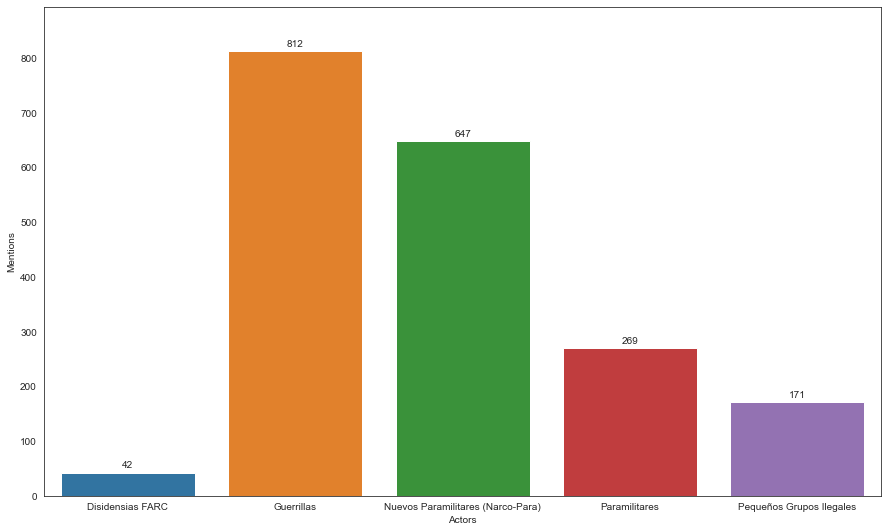

In [119]:
a4_dims = (15, 9)
fig, ax = pyplot.subplots(figsize=a4_dims)

dc = df.groupby('categoria').size().to_frame().reset_index()
dc.columns = ['Actors', 'Mentions']
sns.barplot(data=dc, x="Actors", y="Mentions")
ax.bar_label(ax.containers[0], labels=dc.Mentions, padding=3)
ax.margins(y=0.1)

In [120]:
dc

,Actors,Mentions
0,Disidensias FARC,42
1,Guerrillas,812
2,Nuevos Paramilitares (Narco-Para),647
3,Paramilitares,269
4,Pequeños Grupos Ilegales,171


In [121]:
print('Total of mentions in', df.Filename.nunique() ,'documents:', dc.Mentions.sum())

Total of mentions in 661 documents: 1941


## 4.2 Mention of Actors over time

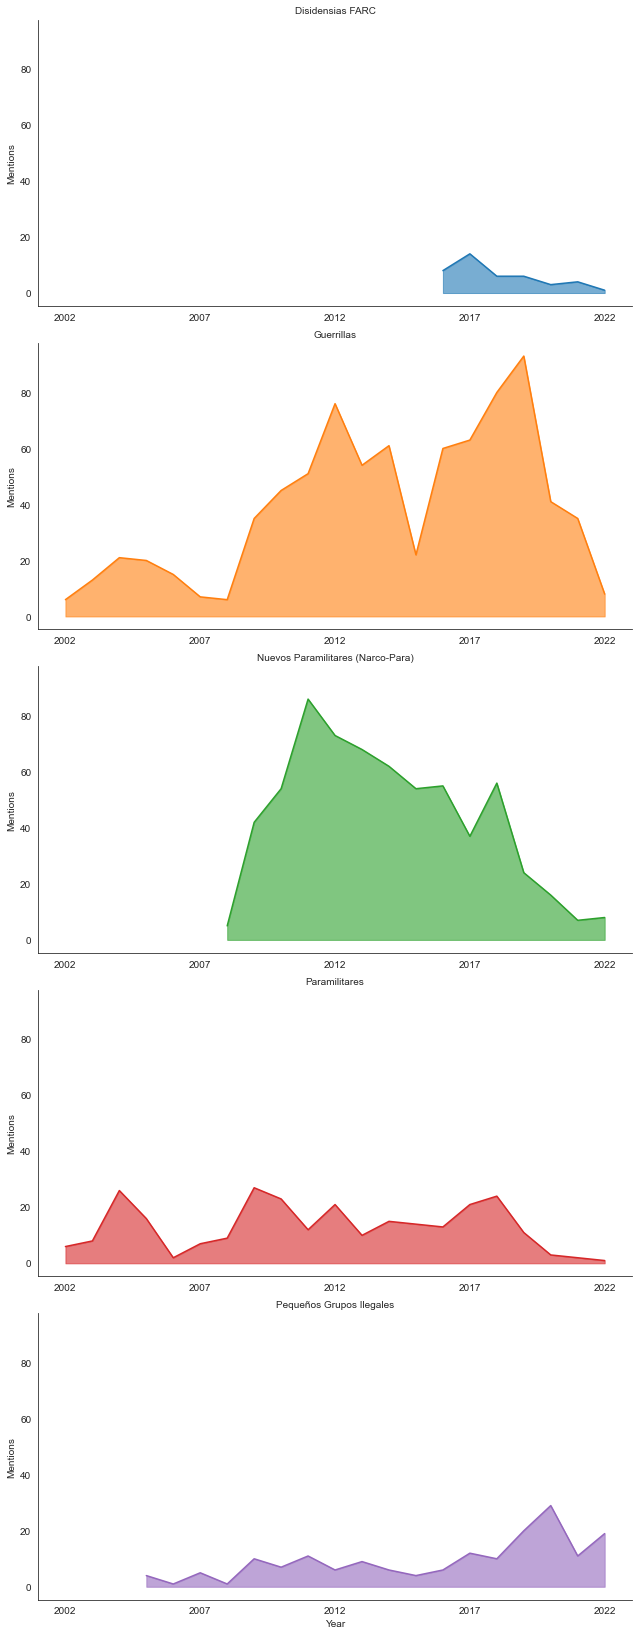

In [122]:
dct = df.groupby(['categoria', 'Year']).size().to_frame()
dct = dct.reset_index()
dct.columns = ['Actors', 'Year', 'Mentions']

g = sns.FacetGrid(dct, col='Actors', hue='Actors', col_wrap=1, height=3, aspect=3)

# Add the line over the area with the plot function
g = g.map(plt.plot, 'Year', 'Mentions')
 
# Fill the area with fill_between
g = g.map(plt.fill_between, 'Year', 'Mentions', alpha=0.6).set_titles("{col_name} Actors")
 
# Control the title of each facet
g = g.set_titles("{col_name}")
 
g.set(xticks=sorted(dct.Year.unique())[::5])

for ax in g.axes.flatten():
    ax.tick_params(labelbottom=True)
    
# Add a title for the whole plot
plt.subplots_adjust(top=1.5)

# Show the graph
plt.show()

# 5. Top 15 actors in each period

In [92]:
df1 = df[df.Year < 2006]
df2 = df[(df.Year > 2005) & (df.Year < 2012)]
df3 = df[(df.Year > 2011) & (df.Year < 2017)]
df4 = df[df.Year > 2016]

## 5.1 2001 - 2005 (Conflicto, 2005 Justicia y Paz)

In [94]:
#Aquí están todos

In [95]:
list_ = df1['clean_NNAJ_actors']
dt = most_mentioned_actors(list_)
dt

,frequency
actors,
Fuerzas Armadas Revolucionarias - Ejército Del Pueblo,50
Autodefensas Unidas De Colombia,41
Autodefensas,7
Ejército De Liberación Nacional,6
Frente Capital,3
Bloque Calima,2
Constru,2
Cordillera,2
Autodefensas Del Bloque Central Santander,1


In [97]:
#categorias
dc1 = df1.groupby('categoria').size().to_frame().reset_index()
dc1.columns = ['Actors', 'Mentions']
dc1

,Actors,Mentions
0,Guerrillas,60
1,Paramilitares,56
2,Pequeños Grupos Ilegales,4


## 5.2 2006- 2011 (Conflicto)

In [99]:
list_ = df2['clean_NNAJ_actors']
dt = most_mentioned_actors(list_)
dt[:10]

,frequency
actors,
Fuerzas Armadas Revolucionarias - Ejército Del Pueblo,124
Águilas Negras,93
Autodefensas Unidas De Colombia,77
Rastrojos,69
Grupo Armado Ilegal,43
Ejército De Liberación Nacional,34
Paisas,22
Urabeños,12
Autodefensas Gaitanistas De Colombia,11


In [100]:
#categorias
dc2 = df2.groupby('categoria').size().to_frame().reset_index()
dc2.columns = ['Actors', 'Mentions']
dc2

,Actors,Mentions
0,Guerrillas,159
1,Nuevos Paramilitares (Narco-Para),187
2,Paramilitares,80
3,Pequeños Grupos Ilegales,35


## 6.3 2012 - 2016 (Negociaciones de Paz, Acuerdo de La Habana)

In [102]:
list_ = df3['clean_NNAJ_actors']
dt = most_mentioned_actors(list_)
dt[:15]

,frequency
actors,
Fuerzas Armadas Revolucionarias - Ejército Del Pueblo,200
Rastrojos,102
Urabeños,76
Autodefensas Unidas De Colombia,71
Ejército De Liberación Nacional,69
Águilas Negras,60
Autodefensas Gaitanistas De Colombia,57
Grupo Armado Ilegal,53
Constru,13


In [103]:
#categorias
dc3 = df3.groupby('categoria').size().to_frame().reset_index()
dc3.columns = ['Actors', 'Mentions']
dc3

,Actors,Mentions
0,Disidensias FARC,8
1,Guerrillas,273
2,Nuevos Paramilitares (Narco-Para),312
3,Paramilitares,73
4,Pequeños Grupos Ilegales,31


# 6.4 2017 - 2022 (Post- Acuerdo)

In [104]:
list_ = df4['clean_NNAJ_actors']
dt = most_mentioned_actors(list_)
dt[:15]

,frequency
actors,
Ejército De Liberación Nacional,168
Fuerzas Armadas Revolucionarias - Ejército Del Pueblo,148
Grupo Armado Ilegal,78
Autodefensas Gaitanistas De Colombia,63
Autodefensas Unidas De Colombia,58
Constru,38
Águilas Negras,23
Paisas,19
Rastrojos,15


In [105]:
#categorias
dc4 = df4.groupby('categoria').size().to_frame().reset_index()
dc4.columns = ['Actors', 'Mentions']
dc4

,Actors,Mentions
0,Disidensias FARC,34
1,Guerrillas,320
2,Nuevos Paramilitares (Narco-Para),148
3,Paramilitares,60
4,Pequeños Grupos Ilegales,101


# 7. Save File

In [128]:
!jupyter nbconvert --to html 17_Actors_Timeline_Report2.0.ipynb

[NbConvertApp] Converting notebook 17_Actors_Timeline_Report2.0.ipynb to html
[NbConvertApp] Writing 747781 bytes to 17_Actors_Timeline_Report2.0.html
